In [ ]:
import pandas as pd
import seaborn as sns
d = sns.load_dataset("penguins")
print(d.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [5]:
dn = d.fillna(value={"bill_length_mm": d["bill_length_mm"].mean(), "species": "Adelie"})
print(dn)
dn.info()

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen        39.10000           18.7              181.0   
1    Adelie  Torgersen        39.50000           17.4              186.0   
2    Adelie  Torgersen        40.30000           18.0              195.0   
3    Adelie  Torgersen        43.92193            NaN                NaN   
4    Adelie  Torgersen        36.70000           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe        43.92193            NaN                NaN   
340  Gentoo     Biscoe        46.80000           14.3              215.0   
341  Gentoo     Biscoe        50.40000           15.7              222.0   
342  Gentoo     Biscoe        45.20000           14.8              212.0   
343  Gentoo     Biscoe        49.90000           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [ ]:
df_filled_ffill = d.fillna(method="ffill")
print("Front Fill")
print(df_filled_ffill)


Front Fill
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Fema

/tmp/ipython-input-3-1592027590.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_ffill = d.fillna(method="ffill")


In [ ]:
df_filled_bfill = d.fillna(method="bfill")
print("Back Fill")
print(df_filled_bfill)


Back Fill
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe            46.8           14.3              215.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Femal

/tmp/ipython-input-4-1499458331.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_bfill = d.fillna(method="bfill")


In [ ]:
df_interpolated = d.interpolate(method="linear")
print("Linear Fill")
print(df_interpolated)


Linear Fill
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1          18.70              181.0   
1    Adelie  Torgersen            39.5          17.40              186.0   
2    Adelie  Torgersen            40.3          18.00              195.0   
3    Adelie  Torgersen            38.5          18.65              194.0   
4    Adelie  Torgersen            36.7          19.30              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe            47.0          14.00              214.5   
340  Gentoo     Biscoe            46.8          14.30              215.0   
341  Gentoo     Biscoe            50.4          15.70              222.0   
342  Gentoo     Biscoe            45.2          14.80              212.0   
343  Gentoo     Biscoe            49.9          16.10              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Fem

/tmp/ipython-input-5-2564906577.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = d.interpolate(method="linear")


In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

df = d.copy()
df = df.dropna(subset=["species"])
le = LabelEncoder()
df["species_le"] = le.fit_transform(df["species"])
print(df[["species", "species_le"]].head())


  species  species_le
0  Adelie           0
1  Adelie           0
2  Adelie           0
3  Adelie           0
4  Adelie           0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df = df.dropna(subset=["island"])
oe = OrdinalEncoder()
df[["island_oe"]] = oe.fit_transform(df[["island"]])
print(df[["island", "island_oe"]].head())


      island  island_oe
0  Torgersen        2.0
1  Torgersen        2.0
2  Torgersen        2.0
3  Torgersen        2.0
4  Torgersen        2.0


In [ ]:
dummies = pd.get_dummies(df["island"], dtype=int)
df_final = pd.concat([df, dummies], axis=1)
print(df_final.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  species_le  island_oe  Biscoe  Dream  Torgersen  
0       3750.0    Male           0        2.0       0      0          1  
1       3800.0  Female           0        2.0       0      0          1  
2       3250.0  Female           0        2.0       0      0          1  
3          NaN     NaN           0        2.0       0      0          1  
4       3450.0  Female           0        2.0       0      0          1  


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

d = sns.load_dataset("penguins")


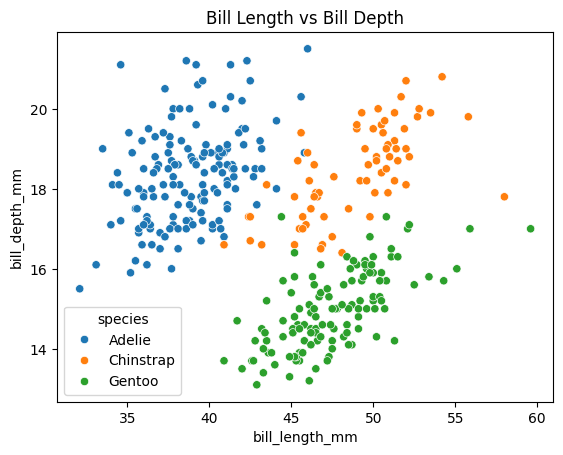

In [4]:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=d)
plt.title("Bill Length vs Bill Depth")
plt.show()
